In [29]:
import metrikz
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import osdf


In [30]:
5616 * 3744 * 3

63078912

In [31]:
def comprimir(imagen, nuevonombre, calidad):
    img = Image.open(imagen)
    img.save(nuevonombre, quality = calidad)
    img1 = os.stat(imagen).st_size
    img2 = os.stat(nuevonombre).st_size
    ratio = img1 / img2
    source = cv2.imread(imagen)
    target = cv2.imread(nuevonombre)

    return metrikz.mse(source, target), ratio




In [32]:
I = Image.open("image1.png")

mse = {}
ratios = {} 
for j in range(1, 9):
  mse["image" + str(j)] = []
  ratios["image" + str(j)] = []

  error, ratio = comprimir("image" + str(j) + ".png","image" + str(j) + ".jpg", 1 )
  mse["image" + str(j)].append(error)
  ratios["image" + str(j)].append(ratio)
  for i in range(10,101, 10):
    error, ratio = comprimir("image" + str(j) + ".png","image" + str(j) + ".jpg", i )
    mse["image" + str(j)].append(error)
    ratios["image" + str(j)].append(ratio)
mse
  



{'image1': [547.7527389526367,
  197.8365003797743,
  115.14761522081163,
  87.1801045735677,
  71.58327229817708,
  60.84124501546224,
  51.427970038519966,
  41.05850728352865,
  29.230106777615017,
  15.224852667914497,
  3.966355217827691],
 'image2': [735.8927586873373,
  261.884405348036,
  151.29136996799045,
  109.63134426540799,
  86.69632042778863,
  71.52345275878906,
  58.83644697401259,
  45.15958574083116,
  30.40557607014974,
  15.000257703993055,
  3.106795416937934],
 'image3': [744.0340881347656,
  280.88788519965277,
  162.4662119547526,
  114.72000291612413,
  90.35973612467448,
  74.21630520290799,
  61.133076985677086,
  46.68508063422309,
  31.610020955403645,
  15.489106920030382,
  2.81770748562283],
 'image4': [418.92058732774524,
  87.52666134304471,
  47.818773905436196,
  34.08497958713107,
  26.81371561686198,
  22.52188449435764,
  19.247801038953995,
  15.429356892903646,
  11.45672861735026,
  6.678792317708333,
  1.31658935546875],
 'image5': [342.5486

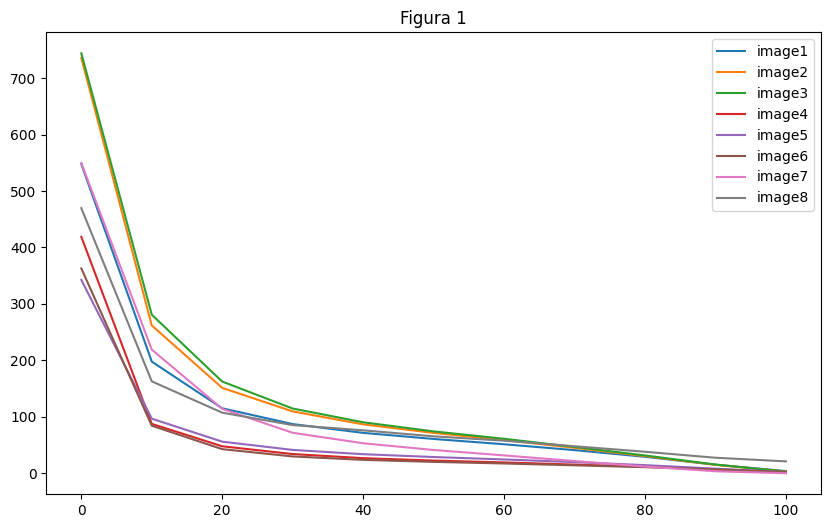

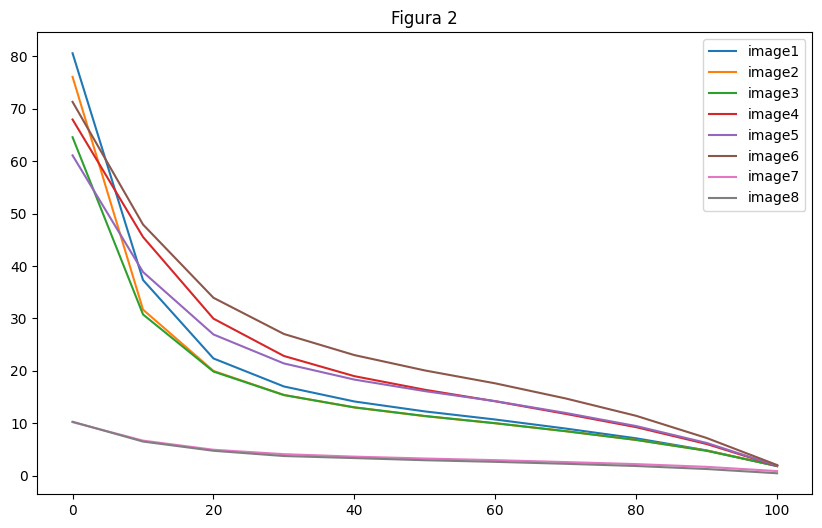

In [33]:
plt.figure(figsize=(10,6))
plt.title("Figura 1")
for i in mse.keys():
  plt.plot(np.arange(0,101, 10),mse[i], label=i)
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
plt.title("Figura 2")
for i in ratios.keys():
  plt.plot(np.arange(0,101, 10),ratios[i], label=i)
plt.legend()
plt.show()

2.c -> Por la cantidad de detalles de la imagen, al haber muchos detalles el error es mayor a la hora de comprimir la imagen, en caso de no haber tanto detalle el error al comprimirla baja.

2.d -> Entre 20 y 40 es la calidad óptima para comprimir la imagen ya que es un punto donde deja de disminuir significativamente el error.

In [34]:
ratios = {}


nombres = ["Airplane", "Baboon", "Moon", "Pepper"]


for i in range(len(nombres)):
  if os.path.exists(f'../../Ex3/Imatges/{nombres[i]}/{nombres[i].lower()}.ppm'):
    term = 'ppm'
  else:
    term = 'pgm'
  original = os.stat(f'../../Ex3/Imatges/{nombres[i]}/{nombres[i].lower()}.{term}').st_size
  comprimidaJLS = os.stat(f'../../Ex3/Imatges/{nombres[i]}/{nombres[i].lower()}.jls').st_size
  ratioJLS = original / comprimidaJLS
  comprimidaJPG = os.stat(f'../../Ex3/Imatges/{nombres[i]}/{nombres[i].lower()}.jpg').st_size
  ratioJPG = original / comprimidaJPG
  comprimidaJPG_2 = os.stat(f'../../Ex3/Imatges/{nombres[i]}/{nombres[i].lower()}_2.jpg').st_size
  ratioJPG_2 = original / comprimidaJPG_2
  comprimidaJPG_4 = os.stat(f'../../Ex3/Imatges/{nombres[i]}/{nombres[i].lower()}_4.jpg').st_size
  ratioJPG_4 = original / comprimidaJPG_4
  comprimidaJLS_2 = os.stat(f'../../Ex3/Imatges/{nombres[i]}/{nombres[i].lower()}_2.jls').st_size
  ratioJLS_2 = original / comprimidaJLS_2
  comprimidaJLS_4 = os.stat(f'../../Ex3/Imatges/{nombres[i]}/{nombres[i].lower()}_4.jls').st_size
  ratioJLS_4 = original / comprimidaJLS_4
  print("NOMBRE ARCHIVO", nombres[i ])
  print("JLS", "JLS_2", "JLS_4","JPG", "JPG_2", "JPG_4")
  print(ratioJLS, ratioJLS_2, ratioJLS_4, ratioJPG, ratioJPG_2, ratioJPG_4 )

NOMBRE ARCHIVO Airplane
JLS JLS_2 JLS_4 JPG JPG_2 JPG_4
2.0272241754389584 7.294336962771976 26.6679099416791 3.669648147888934 8.057803823535439 29.094776561112756
NOMBRE ARCHIVO Baboon
JLS JLS_2 JLS_4 JPG JPG_2 JPG_4
1.260109830878647 4.976687447299669 77.75993520518358 2.1908872390920706 5.462384597294816 77.1848000857541
NOMBRE ARCHIVO Moon
JLS JLS_2 JLS_4 JPG JPG_2 JPG_4
2.0470963860996716 7.699770258980785 28.719683199169047 1.6586358932829441 6.873803604723431 24.471622967142384
NOMBRE ARCHIVO Pepper
JLS JLS_2 JLS_4 JPG JPG_2 JPG_4
1.6825186972668618 6.92948836553626 25.499789255260513 3.1440986935734045 6.942272045193751 24.600875821082266
